# CNN for image classification
## dataset: Fashion MNIST
-  Fashion MNIST contains 70,000 grayscale images in 10 categories. 
-  The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:
-  It's a slightly more challenging problem than regular MNIST
![image.png](attachment:image.png)

## Download dataset
Loading the dataset returns four NumPy arrays:
-  The <font color=green><b>train_images</b></font> and <font color=green><b>train_labels</b></font> arrays are the training set—the data the model uses to learn.
-  The model is tested against the test set, the <font color=red><b>test_images</b></font>, and <font color=red><b>test_labels</b></font> arrays.

-  The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. 
-  The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

<td style="text-align:left;">

| Lable|Class|
|---|---|
|   0   | T-shirt/top|
|   1   | Trouser    |
|   2   | Pullover   |
|   3   | Dress      |
|   4   | Coat       |
|   5   | Sandal     |
|   6   | Shirt      |
|   7   | Sneaker    |
|   8   | Bag        |
|   9   | Ankle boot |



In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.10.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
len(class_names)

10

## Explore the data

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_labels.shape

(10000,)

In [45]:
train_labels[0]

9

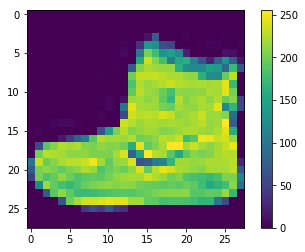

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Scale value to range 0 to 1 

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0


### Display the first 25 images

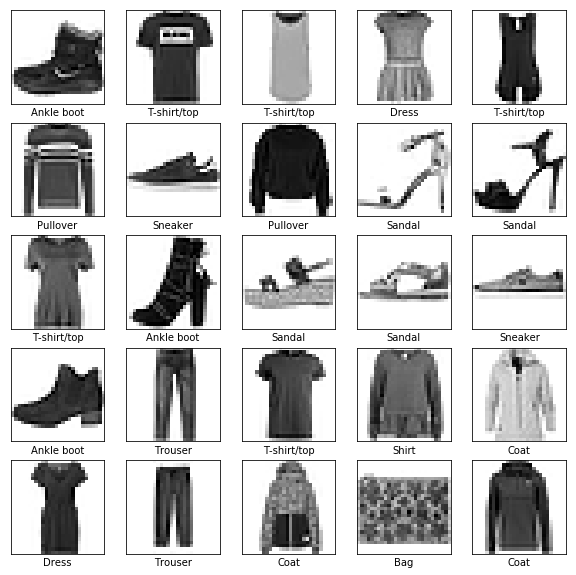

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build model

In [13]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense



Using TensorFlow backend.


### expand dimension for 2D CNN

In [14]:
train_x = np.expand_dims(train_images,-1)
test_x = np.expand_dims(test_images,-1)

print(train_x.shape)
print(test_x.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [16]:
bn_axis = 3

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_x.shape[1:]))
# batchnormalization
# model.add(BatchNormalization(axis=bn_axis, name='bn_conv1'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_names), activation='softmax'))


In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [17]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [18]:
model.fit(train_x, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 65s 1ms/step - loss: 0.4236 - acc: 0.8518
Epoch 2/5
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2899 - acc: 0.8952
Epoch 3/5
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2551 - acc: 0.9061
Epoch 4/5
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2282 - acc: 0.9153
Epoch 5/5
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2077 - acc: 0.9227


In [22]:
%%time 
model.fit(train_x, train_labels, batch_size=64 ,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1007 - acc: 0.9625
Epoch 2/2
60000/60000 [==============================] - 60s 998us/step - loss: 0.0956 - acc: 0.9645
CPU times: user 8min 51s, sys: 1min 37s, total: 10min 29s
Wall time: 2min


In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
bn_conv1 (BatchNormalization (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
__________

### Evaluate on test set

In [23]:
test_loss, test_acc = model.evaluate(test_x, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 5s 471us/step
Test accuracy: 0.9105


### Make predictions

In [25]:
predictions = model.predict(test_x)

In [28]:
predictions[100]

array([1.8081046e-08, 1.5234444e-09, 4.5128830e-09, 9.9999988e-01,
       3.6452001e-11, 5.1818542e-14, 8.7754884e-08, 7.5069123e-13,
       2.5941405e-10, 1.1157172e-14], dtype=float32)

In [29]:
np.argmax(predictions[100])

3

In [30]:
# ground truth
test_labels[100]

3

In [31]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


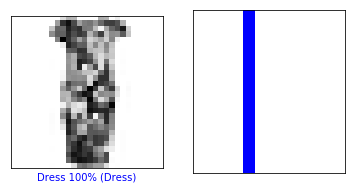

In [33]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


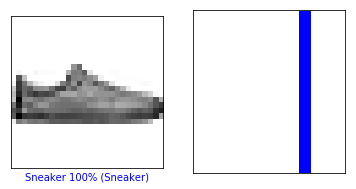

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


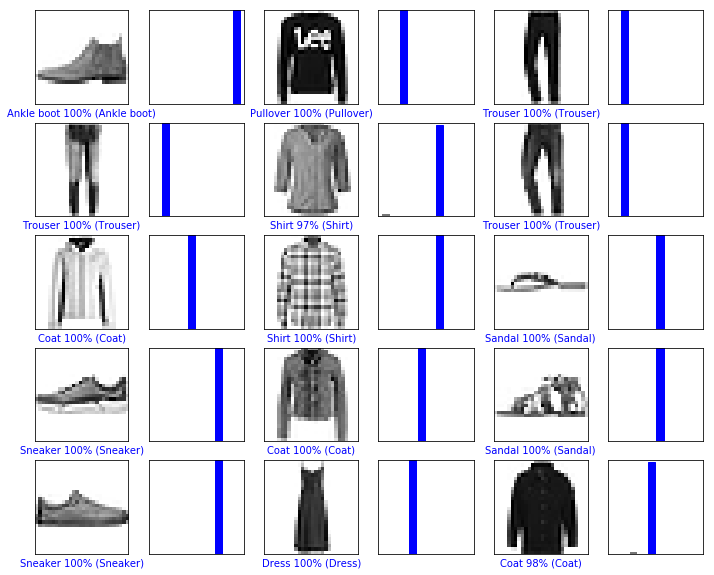

In [35]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


### expand dim for single prediction
keras models are optimized to <b>make predictions on a batch</b>, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [38]:
img = test_x[100]
img = (np.expand_dims(img,0))
print(img.shape)


(1, 28, 28, 1)


In [39]:
predictions_single = model.predict(img)

print(predictions_single)


[[1.8081115e-08 1.5234444e-09 4.5129260e-09 9.9999988e-01 3.6452213e-11
  5.1818840e-14 8.7755218e-08 7.5070267e-13 2.5941752e-10 1.1157257e-14]]


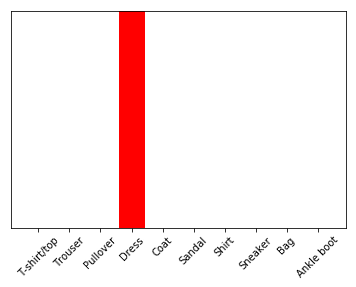

In [40]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [41]:
np.argmax(predictions_single[0])

3

# Exercises

## Exercise 0 
CNN  + Auto-encoder

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_x = np.expand_dims(train_images,-1)
test_x = np.expand_dims(test_images,-1)

print(train_x.shape)
print(test_x.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense,UpSampling2D



In [ ]:
## Convulutional autoencoder


model = Sequential()
 
#1st convolution layer
model.add(Conv2D(16, (3, 3) #16 is number of filters and (3, 3) is the size of the filter.
, padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
 
#2nd convolution layer
model.add(Conv2D(2,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
 
#here compressed version
 
#3rd convolution layer
model.add(Conv2D(2,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))
 
#4rd convolution layer
model.add(Conv2D(16,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))
 
model.add(Conv2D(1,(3, 3), padding='same'))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

In [ ]:
# Training
model.compile(optimizer='adadelta', loss='binary_crossentropy')
model.fit(x_train, x_train, epochs=3, validation_data=(x_test, x_test))
restored_imgs = model.predict(x_test)

In [ ]:
## Visualization
 
for i in range(5):
plt.imshow(x_test[i].reshape(28, 28))
plt.gray()
plt.show()
 
plt.imshow(restored_imgs[i].reshape(28, 28))
plt.gray()
plt.show()

In [ ]:
## extract compressed representations.
from keras import backend as K

compressed_layer = 5
get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[compressed_layer].output])
compressed = get_3rd_layer_output([x_test])[0]
 
#flatten compressed representation to 1 dimensional array
compressed = compressed.reshape(10000,7*7*2)

In [ ]:
 ## apply k-means clustering.
    
from tensorflow.contrib.factorization.python.ops import clustering_ops
import tensorflow as tf
 
def train_input_fn():
data = tf.constant(compressed, tf.float32)
return (data, None)
 
unsupervised_model = tf.contrib.learn.KMeansClustering(
10 #num of clusters
, distance_metric = clustering_ops.SQUARED_EUCLIDEAN_DISTANCE
, initial_clusters=tf.contrib.learn.KMeansClustering.RANDOM_INIT
)
 
unsupervised_model.fit(input_fn=train_input_fn, steps=1000)

In [ ]:
clusters = unsupervised_model.predict(input_fn=train_input_fn)
 
index = 0
for i in clusters:
current_cluster = i['cluster_idx']
features = x_test[index]
index = index + 1